**scikit-learn**\
scikit-learn은 가장 널리 쓰이는 머신러닝 알고리듬 함수들이 포함된 라이브러이입니다. Import할때는 sklearn으로 사용합니다.

In [32]:
!pip install scikit-learn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('reg_data/mlb_sample.csv')
print(df)

     ID  YEAR NAME        wp   w  ps  ws  AL         rev     smsa
0     1  2000   AZ  0.524691  85   0   0   0  141.191894  3278661
1     1  2001   AZ  0.567901  92   1   1   0  134.330353  3388445
2     1  2002   AZ  0.604938  98   1   0   0  153.936188  3496957
3     1  2003   AZ  0.518519  84   0   0   0  144.580612  3600163
4     1  2004   AZ  0.314815  51   0   0   0  145.447601  3723359
..   ..   ...  ...       ...  ..  ..  ..  ..         ...      ...
445  30  2010  WAS  0.425926  69   0   0   0  194.000000  5664789
446  30  2011  WAS  0.496894  80   0   0   0  193.880118  5771506
447  30  2012  WAS  0.604938  98   1   0   0  213.692866  5862594
448  30  2013  WAS  0.456790  74   0   0   0  228.392639  5949859
449  30  2014  WAS  0.592593  96   1   0   0  264.353845  6033737

[450 rows x 10 columns]


불러온 데이터에서 필요한 데이터만을 추출하여 피쳐와 타겟변수로 구분합니다. sklearn에서는 따로 절편값을 계산해주니 피쳐 변수에 일부러 절편값을 입력할 필요는 없습니다.

In [3]:
df['smsa'] = df['smsa']/1000000
columns = ['wp', 'ps', 'ws', 'AL', 'smsa']
X = df[columns].to_numpy()
y = df['rev']

데이터를 트레이닝 데이터와 테스트 데이터로 구분해줍니다. sklearn에 있는 train_test_split함수를 사용해줍니다. train_test_split함수는 설정한 비율대로 데이터를 random하게 나누어 줍니다.

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

sklearn에 있는 LinearRegression 함수를 불러옵니다. 오브젝트에 모형을 입력해준 이후 .fit()옵션으로 트레이닝 데이터를 투입해 줍니다.

In [5]:
from sklearn.linear_model import LinearRegression
rev = LinearRegression()
rev.fit(x_train, y_train) 

LinearRegression()

.coef_옵션을 통해 계수추정값이 얼마인지 확인해봅니다.

In [6]:
print(rev.coef_)

[36.40997463 21.85610579 -0.2846206   6.93620758  6.29551102]


In [7]:
# The coefficients
slope = rev.coef_[0]
intercept = rev.intercept_
# 모델을 선형회귀식으로 표현
line = f'Regression line: Y = {intercept:.2f} + {slope:.2f}X'
# 선형회귀식을 출력
print(line)

Regression line: Y = 114.36 + 36.41X


y예측값을 계산합니다.

In [8]:
y_predict = rev.predict(x_test)

실제 테스트 값과 예측값 사이의 관계를 알아보겠습니다.

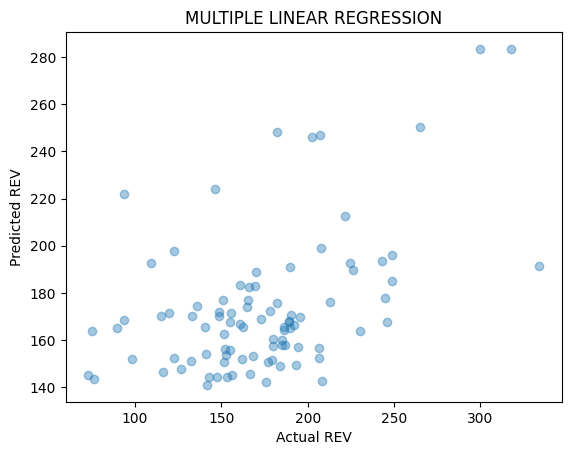

In [9]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual REV")
plt.ylabel("Predicted REV")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

모형의 적합도 및 성능을 알아봅니다.\
R2와 Adj-R2은 0에서 1사이의 값을 갖는데, 1에 가까울수록 설명력이 높습니다.\
MSE, RMSE, MAE, MAPE는 낮을수록 좋습니다.

In [10]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predict)
mape = mean_absolute_percentage_error(y_test, y_predict)
n = X.shape[0]
k = X.shape[1]
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)


print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("MAPE: ", mape)
print("R^2 score: ", r2)
print("Adjusted R^2 score: ", adj_r2)

MSE:  1843.99564593392
RMSE:  42.94177040986922
MAE:  32.88194944054906
MAPE:  0.22312243481818694
R^2 score:  0.22072454667133212
Adjusted R^2 score:  0.2119489221969102


데이터포인스 수가 많이 부족해서 80%로 트레이닝 한 값과 100% 전체로 한 값에 차이가 많이 납니다.

In [11]:
rev = LinearRegression()
rev.fit(X,y)
print(rev.intercept_)
print(rev.coef_)

125.99726381218986
[15.29678219 21.29186902  8.56317855  5.10219982  6.17888509]
